In [2]:
from glob import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

plt.rc('font', family='malgun gothic')
plt.rc('axes', unicode_minus=False)

In [3]:
lst_data = glob('./data/*')
var_data = ['cust_demo', 'prod_buy', 'service_use', 'prod_cat', 'partner', 'lpay']
for name, file in zip(var_data, lst_data):
    globals()[name] = pd.read_csv(file)

C:\Users\KwonYujin\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
for name in var_data:
    print(name, ': ', globals()[name].shape)

cust_demo :  (29913, 4)
prod_buy :  (4381743, 10)
service_use :  (248304, 9)
prod_cat :  (1933, 4)
partner :  (8808, 4)
lpay :  (353184, 7)


In [4]:
for name in var_data:
    print(name, ': ', ', '.join(globals()[name].columns))

cust_demo :  cust, ma_fem_dv, ages, zon_hlv
prod_buy :  cust, rct_no, chnl_dv, cop_c, br_c, pd_c, de_dt, de_hr, buy_am, buy_ct
service_use :  cust, rct_no, cop_c, br_c, chnl_dv, de_dt, vst_dt, de_hr, buy_am
prod_cat :  pd_c, pd_nm, clac_hlv_nm, clac_mcls_nm
partner :  br_c, cop_c, zon_hlv, zon_mcls
lpay :  cust, rct_no, cop_c, chnl_dv, de_dt, de_hr, buy_am


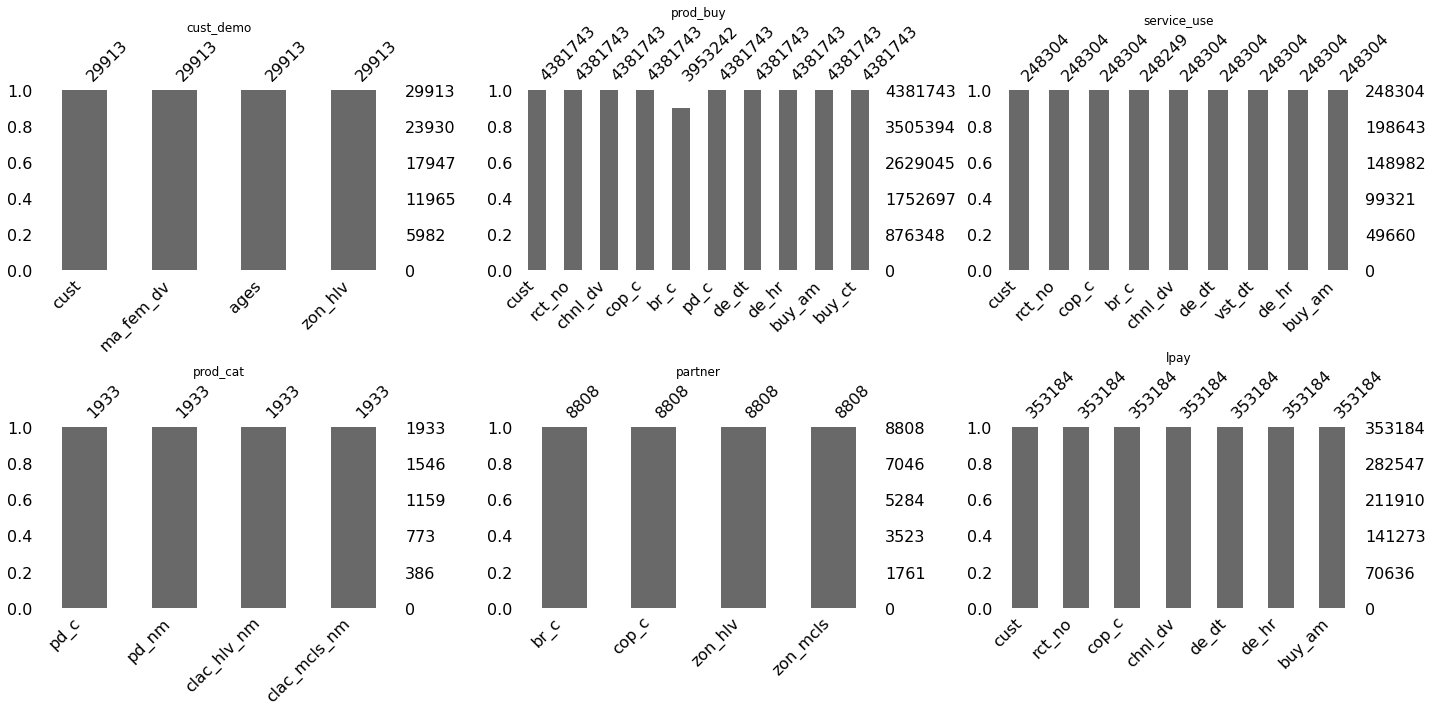

In [9]:
fig, axes = plt.subplots(2,3, figsize=(20,10))
for idx, data in enumerate(var_data):
    msno.bar(globals()[data], ax=axes[idx//3, idx%3])
    axes[idx//3, idx%3].set_title(data)
plt.tight_layout()
plt.show()

#### 결측값
- prod_buy: br_c(점포 코드)
- service_use: br_c(점포 코드)
- **오프라인 구매만 결측값!!!!!!!!!!!**

#### cust_demo

In [3]:
cust_demo.ma_fem_dv = cust_demo.ma_fem_dv.astype('category')
cust_demo.ma_fem_dv = cust_demo.ma_fem_dv.cat.reorder_categories(['남성', '여성'])

cust_demo.ages = cust_demo.ages.astype('category')
cust_demo.ages = cust_demo.ages.cat.reorder_categories([str(i)+'0대' for i in range(2,8)])

cust_demo.zon_hlv = cust_demo.zon_hlv.astype('category')
cust_demo.zon_hlv = cust_demo.zon_hlv.cat.reorder_categories(['Z0'+str(i) if i < 10 else 'Z'+str(i) for i in range(1, 18)])

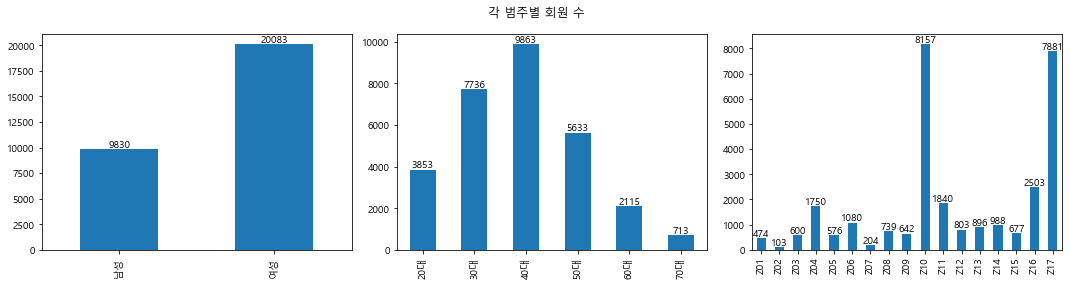

In [106]:
fig, axes = plt.subplots(1,3, figsize=(15,4))

cust_demo.ma_fem_dv.value_counts(sort=False).plot.bar(ax=axes[0])
for x, y in enumerate(cust_demo.ma_fem_dv.value_counts(sort=False)):
    axes[0].text(x, y, y, horizontalalignment='center', verticalalignment='bottom')
cust_demo.ages.value_counts(sort=False).plot.bar(ax=axes[1])
for x, y in enumerate(cust_demo.ages.value_counts(sort=False)):
    axes[1].text(x, y, y, horizontalalignment='center', verticalalignment='bottom')
cust_demo.zon_hlv.value_counts(sort=False).plot.bar(ax=axes[2])
for x, y in enumerate(cust_demo.zon_hlv.value_counts(sort=False)):
    axes[2].text(x, y, y, horizontalalignment='center', verticalalignment='bottom')

plt.suptitle('각 범주별 회원 수')
plt.tight_layout()
plt.show()

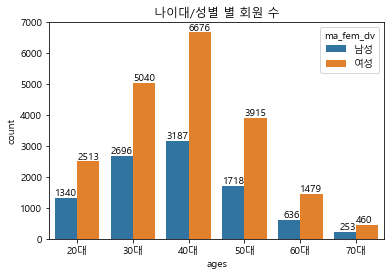

In [105]:
sns.countplot(x = "ages", hue = "ma_fem_dv", data=cust_demo)
plt.title('나이대/성별 별 회원 수')
for idx, value in enumerate(cust_demo.groupby('ages')['ma_fem_dv'].value_counts().values):
    if idx % 2 == 0:
        plt.text(idx//2, value, value, horizontalalignment='left', verticalalignment='bottom')
    else:
        plt.text(idx//2, value, value, horizontalalignment='right', verticalalignment='bottom')
plt.show()

#### prod_buy

In [107]:
prod_buy.columns

Index(['cust', 'rct_no', 'chnl_dv', 'cop_c', 'br_c', 'pd_c', 'de_dt', 'de_hr',
       'buy_am', 'buy_ct'],
      dtype='object')

In [108]:
prod_buy.head()

,cust,rct_no,chnl_dv,cop_c,br_c,pd_c,de_dt,de_hr,buy_am,buy_ct
0,M430112881,A01000001113,1,A01,A010039,PD0290,20210101,10,15000.0,1
1,M646853852,A01000002265,1,A01,A010025,PD1369,20210101,10,79700.0,1
2,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000.0,1
3,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000.0,1
4,M430112881,A01000004946,1,A01,A010039,PD0290,20210101,10,19000.0,1


개당 개수 - 이상함

In [122]:
prod_buy['per_am'] = prod_buy.buy_am / prod_buy.buy_ct

prod_buy.groupby('pd_c').per_am.unique()

# ???
# 내가 계산을 잘못했나?
# 왜 개당 가격이 다르지?
# 할인? 포인트?

pd_c
PD0001    [2960000.0, 2780000.0, 300000.0, 3174000.0, 10...
PD0002    [139000.0, 110000.0, 116000.0, 5900.0, 55800.0...
PD0003    [340000.0, 1300000.0, 79000.0, 1450000.0, 1190...
PD0004    [84000.0, 4039000.0, 225000.0, 538000.0, 39600...
PD0005    [1000.0, 150000.0, 224800.0, 2132000.0, 200000...
                                ...                        
PD1929    [219000.0, 255000.0, 78000.0, 34000.0, 109000....
PD1930    [164000.0, 116000.0, 80000.0, 95000.0, 40000.0...
PD1931    [282000.0, 310000.0, 192000.0, 55000.0, 198000...
PD1932    [210000.0, 140000.0, 129000.0, 100000.0, 12000...
PD1933    [215000.0, 141000.0, 96000.0, 25000.0, 50000.0...
Name: per_am, Length: 1933, dtype: object

In [4]:
trans_lst = pd.merge(prod_buy, cust_demo, on='cust', how='left')
trans_lst = pd.merge(trans_lst, prod_cat, on='pd_c', how='left')

거래 수

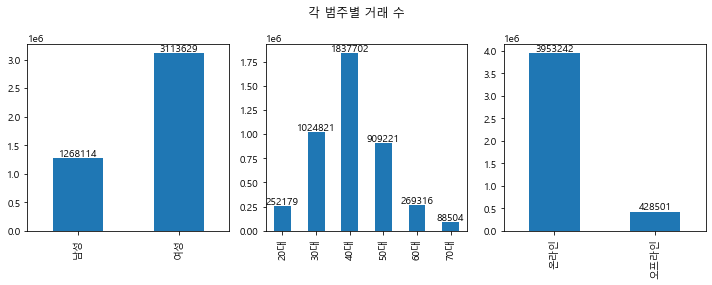

In [142]:
fig, axes = plt.subplots(1,3, figsize=(10,4))

trans_lst.ma_fem_dv.value_counts(sort=False).plot.bar(ax=axes[0])
for x, y in enumerate(trans_lst.ma_fem_dv.value_counts(sort=False)):
    axes[0].text(x, y, y, horizontalalignment='center', verticalalignment='bottom')
trans_lst.ages.value_counts(sort=False).plot.bar(ax=axes[1])
for x, y in enumerate(trans_lst.ages.value_counts(sort=False)):
    axes[1].text(x, y, y, horizontalalignment='center', verticalalignment='bottom')
trans_lst.chnl_dv.value_counts(sort=False).plot.bar(ax=axes[2])
axes[2].set_xticklabels(['온라인', '오프라인'])
for x, y in enumerate(trans_lst.chnl_dv.value_counts(sort=False)):
    axes[2].text(x, y, y, horizontalalignment='center', verticalalignment='bottom')


plt.suptitle('각 범주별 거래 수')
plt.tight_layout()
plt.show()

C:\Users\KwonYujin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


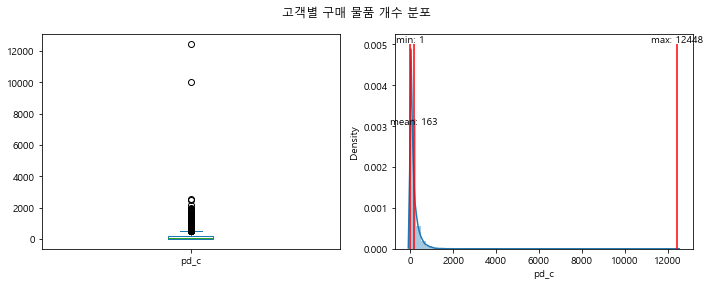

In [168]:
fig, axes = plt.subplots(1,2, figsize=(10,4))

data = trans_lst.groupby('cust').pd_c.count()
data.plot.box(ax=axes[0])
sns.distplot(data, ax=axes[1])
axes[1].vlines(data.mean(),0, 0.005, color='r')
axes[1].text(data.mean(), 0.003, 'mean: '+str(round(data.mean())), horizontalalignment='center', verticalalignment='bottom')
axes[1].vlines(data.min(),0, 0.005, color='r')
axes[1].text(data.min(), 0.005, 'min: '+str(data.min()), horizontalalignment='center', verticalalignment='bottom')
axes[1].vlines(data.max(),0, 0.005, color='r')
axes[1].text(data.max(), 0.005, 'max: '+str(data.max()), horizontalalignment='center', verticalalignment='bottom')

plt.suptitle('고객별 구매 물품 개수 분포')
plt.tight_layout()
plt.show()

In [169]:
data.describe()

count    26917.000000
mean       162.787198
std        227.442772
min          1.000000
25%         30.000000
50%         88.000000
75%        214.000000
max      12448.000000
Name: pd_c, dtype: float64

영수증

C:\Users\KwonYujin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


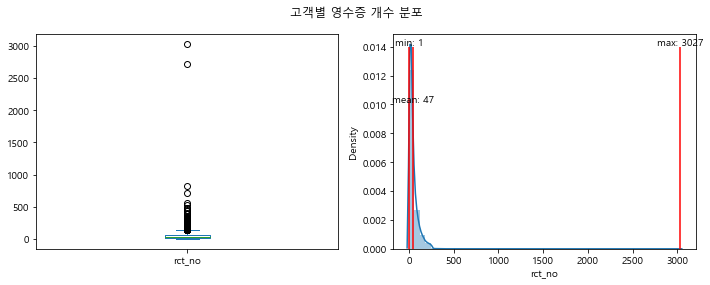

In [178]:
fig, axes = plt.subplots(1,2, figsize=(10,4))

data = trans_lst.groupby('cust').rct_no.nunique()
data.plot.box(ax=axes[0])
sns.distplot(data, ax=axes[1])
axes[1].vlines(data.mean(),0, 0.014, color='r')
axes[1].text(data.mean(), 0.01, 'mean: '+str(round(data.mean())), horizontalalignment='center', verticalalignment='bottom')
axes[1].vlines(data.min(),0, 0.014, color='r')
axes[1].text(data.min(), 0.014, 'min: '+str(data.min()), horizontalalignment='center', verticalalignment='bottom')
axes[1].vlines(data.max(),0, 0.014, color='r')
axes[1].text(data.max(), 0.014, 'max: '+str(data.max()), horizontalalignment='center', verticalalignment='bottom')

plt.suptitle('고객별 영수증 개수 분포')
plt.tight_layout()
plt.show()

In [179]:
data.describe()

count    26917.000000
mean        47.055355
std         55.997831
min          1.000000
25%         14.000000
50%         30.000000
75%         62.000000
max       3027.000000
Name: rct_no, dtype: float64

C:\Users\KwonYujin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


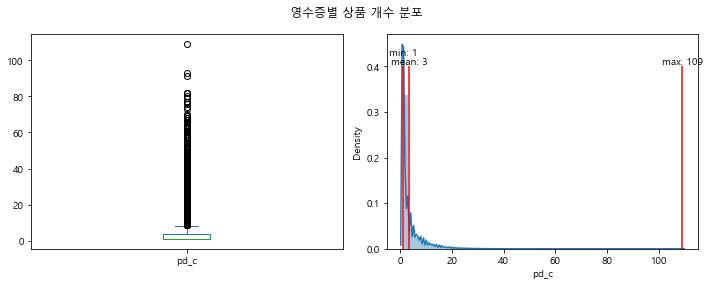

In [177]:
fig, axes = plt.subplots(1,2, figsize=(10,4))

data = trans_lst.groupby('rct_no').pd_c.count()
data.plot.box(ax=axes[0])
sns.distplot(data, ax=axes[1])
axes[1].vlines(data.mean(),0, 0.4, color='r')
axes[1].text(data.mean(), 0.4, 'mean: '+str(round(data.mean())), horizontalalignment='center', verticalalignment='bottom')
axes[1].vlines(data.min(),0, 0.4, color='r')
axes[1].text(data.min(), 0.42, 'min: '+str(data.min()), horizontalalignment='center', verticalalignment='bottom')
axes[1].vlines(data.max(),0, 0.4, color='r')
axes[1].text(data.max(), 0.4, 'max: '+str(data.max()), horizontalalignment='center', verticalalignment='bottom')

plt.suptitle('영수증별 상품 개수 분포')
plt.tight_layout()
plt.show()

In [176]:
data.describe()

count    1.266589e+06
mean     3.459483e+00
std      4.555795e+00
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      4.000000e+00
max      1.090000e+02
Name: pd_c, dtype: float64

업종/점포

C:\Users\KwonYujin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


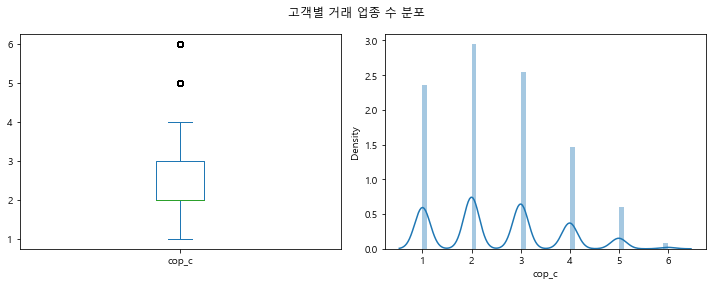

In [203]:
fig, axes = plt.subplots(1,2, figsize=(10,4))

data = trans_lst.groupby('cust').cop_c.nunique()
data.plot.box(ax=axes[0])
sns.distplot(data, ax=axes[1])

plt.suptitle('고객별 거래 업종 수 분포')
plt.tight_layout()
plt.show()

In [204]:
print(data.describe())
print('freq: ' + str(data.mode()))

count    26917.000000
mean         2.526359
std          1.213141
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: cop_c, dtype: float64
freq: 0    2
dtype: int64


C:\Users\KwonYujin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


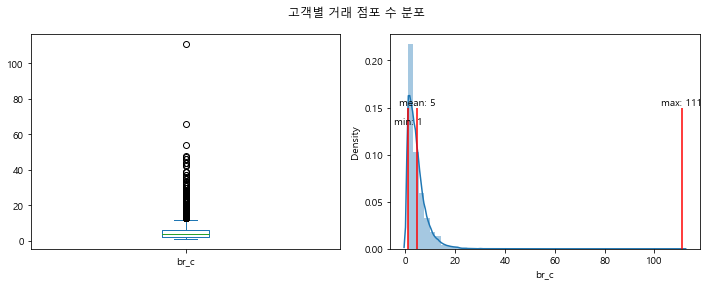

In [205]:
fig, axes = plt.subplots(1,2, figsize=(10,4))

data = trans_lst.dropna().groupby('cust').br_c.nunique()
data.plot.box(ax=axes[0])
sns.distplot(data, ax=axes[1])
axes[1].vlines(data.mean(),0, 0.15, color='r')
axes[1].text(data.mean(), 0.15, 'mean: '+str(round(data.mean())), horizontalalignment='center', verticalalignment='bottom')
axes[1].vlines(data.min(),0, 0.15, color='r')
axes[1].text(data.min(), 0.13, 'min: '+str(data.min()), horizontalalignment='center', verticalalignment='bottom')
axes[1].vlines(data.max(),0, 0.15, color='r')
axes[1].text(data.max(), 0.15, 'max: '+str(data.max()), horizontalalignment='center', verticalalignment='bottom')

plt.suptitle('고객별 거래 점포 수 분포')
plt.tight_layout()
plt.show()

In [206]:
print(data.describe())
print('freq: ' + str(data.mode()[0]))

count    26027.000000
mean         4.643831
std          3.906914
min          1.000000
25%          2.000000
50%          4.000000
75%          6.000000
max        111.000000
Name: br_c, dtype: float64
freq: 1


In [5]:
trans_lst['cop_c'] = trans_lst['cop_c'].astype('category')
trans_lst['cop_c'] = trans_lst['cop_c'].cat.reorder_categories(['A0'+str(i) for i in range(1,7)])

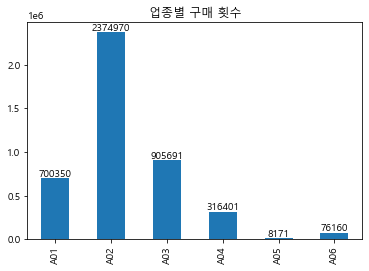

In [226]:
data = trans_lst.cop_c.value_counts(sort=False)
data.plot.bar()
plt.title('업종별 구매 횟수')
for idx, value in enumerate(data.values):
    plt.text(idx, value, value, horizontalalignment='center', verticalalignment='bottom')
plt.show()

온라인/오프라인 여부 별 점포 수

In [217]:
trans_lst.groupby('br_c').chnl_dv.nunique().unique()

array([1], dtype=int64)

In [225]:
trans_lst.loc[trans_lst.br_c.isna(), 'chnl_dv'].unique()

array([2], dtype=int64)

In [222]:
(trans_lst.chnl_dv == 2).sum()

428501

In [221]:
trans_lst.groupby('chnl_dv').br_c.nunique()

chnl_dv
1    6755
2       0
Name: br_c, dtype: int64

- 성별/나이대
- 나이대별 구매 분포
- 나이대별 구매 횟수 / 회원 수
- 온라인, 오프라인 점포 수
- 영수증 별(한번 구매할때 몇 개를 구매)
  - 하루에 몇 개
  - 무슨 종류(뭐뭐를 같이 구매?)
- 구매 주기
- 구매 금액과 연관 지어
  - 비슷한 범주의 아이템 중 가격대가 어디에 형성되는지?

#### service_use

In [110]:
service_use.head()

,cust,rct_no,cop_c,br_c,chnl_dv,de_dt,vst_dt,de_hr,buy_am
0,M839993508,21102612B015763935,B01,B010012,1,20211026,20211026,12,60000
1,M839993508,21110610B014219744,B01,B010012,1,20211106,20211106,10,17100
2,M839993508,21021112B013419710,B01,B010012,1,20210211,20210211,12,136500
3,M839993508,21092010B012637545,B01,B010012,1,20210920,20210920,10,34200
4,M839993508,21101009D015920171,D01,D010614,1,20211010,20211010,9,2500


In [227]:
service_use.cop_c.unique()

array(['B01', 'D01', 'C01', 'D02', 'C02', 'E01'], dtype=object)

In [11]:
service_use['cop_c'] = service_use['cop_c'].astype('category')
service_use['cop_c'] = service_use['cop_c'].cat.reorder_categories(sorted(service_use['cop_c'].unique()))

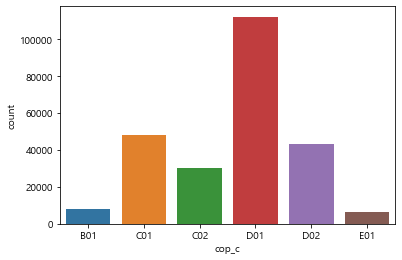

In [12]:
sns.countplot(data=service_use, x='cop_c')
plt.show()

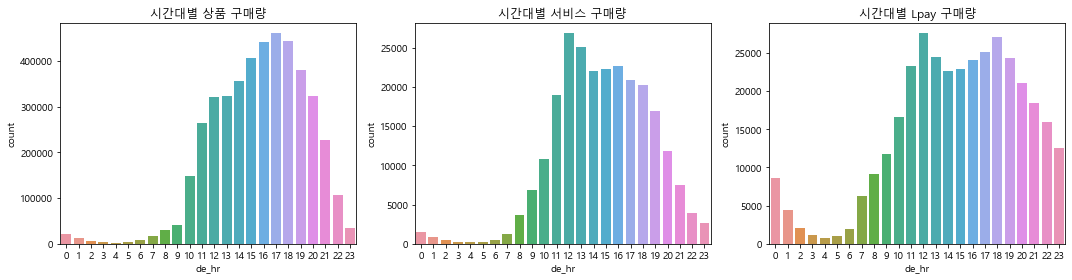

In [7]:
fig, axes = plt.subplots(1,3, figsize=(15,4))
sns.countplot(data=prod_buy, x='de_hr', ax=axes[0])
axes[0].set_title('시간대별 상품 구매량')
sns.countplot(data=service_use, x='de_hr', ax=axes[1])
axes[1].set_title('시간대별 서비스 구매량')
sns.countplot(data=lpay, x='de_hr', ax=axes[2])
axes[2].set_title('시간대별 Lpay 구매량')
plt.tight_layout()
plt.show()

#### lpay

In [242]:
lpay['product/service'] = lpay.cop_c.map(lambda x: 'product' if x.startswith('A') else 'service')

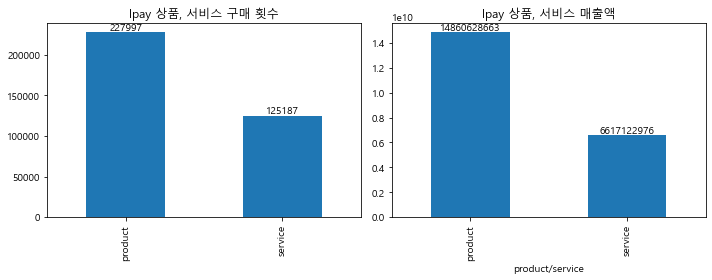

In [263]:
fig, axes = plt.subplots(1,2, figsize=(10,4))
lpay['product/service'].value_counts().plot.bar(ax=axes[0])
for idx, value in enumerate(lpay['product/service'].value_counts().values):
    axes[0].text(idx, value, value, horizontalalignment='center', verticalalignment='bottom')
axes[0].set_title('lpay 상품, 서비스 구매 횟수')
lpay.groupby('product/service').buy_am.sum().plot.bar(ax=axes[1])
for idx, value in enumerate(lpay.groupby('product/service').buy_am.sum()):
    axes[1].text(idx, value, value, horizontalalignment='center', verticalalignment='bottom')
axes[1].set_title('lpay 상품, 서비스 매출액')
plt.tight_layout()
plt.show()

In [5]:
lpay_rct_lst

array(['210803210311226', '210803130167542', '210803140275112', ...,
       '210119200278240', '210119180267206', '210119150154756'],
      dtype=object)

In [4]:
lpay_rct_lst = lpay.rct_no.astype('str').unique()

print('product: ' + str(prod_buy.query('rct_no in @lpay_rct_lst').shape[0]))
print('service: ' + str(service_use.query('rct_no in @lpay_rct_lst').shape[0]))
# 위 테이블들과 겹치지 않는다.
# 이유는?

product: 0
service: 0


In [4]:
prod_cust = set(prod_buy.cust.unique())
service_cust = set(service_use.cust.unique())
lpay_cust = set(lpay.cust.unique())

In [10]:
print('total cust: ', cust_demo.cust.nunique())
print('prod cust: ', prod_buy.cust.nunique())
print('service cust: ', service_use.cust.nunique())
print('lpay cust: ', lpay.cust.nunique())
print('-------------------------------')
print('product&lpay_cust: ', len(prod_cust & lpay_cust))
print('service&lpay_cust: ', len(service_cust & lpay_cust))
print('product&service&lpay_cust: ', len(prod_cust & service_cust & lpay_cust))
# 유저는 겹친다!!!!!!!!!!!!!!!!!

total cust:  29913
prod cust:  26917
service cust:  21769
lpay cust:  8906
-------------------------------
product&lpay_cust:  8576
service&lpay_cust:  8091
product&service&lpay_cust:  7879


In [17]:
intersect = list(prod_cust & service_cust & lpay_cust)
id_ = intersect[0]
print('product')
display(prod_buy.query('cust == @id_'))
print('service')
display(service_use.query('cust == @id_'))
print('lpay')
display(lpay.query('cust == @id_'))

product


,cust,rct_no,chnl_dv,cop_c,br_c,pd_c,de_dt,de_hr,buy_am,buy_ct
88946,M885655793,E01001166202,2,A01,NaN,PD1922,20210223,9,157000.0,1
88947,M885655793,E01001166202,2,A01,NaN,PD1889,20210223,9,70000.0,1
99115,M885655793,A01070848182,1,A01,A010019,PD1013,20210228,16,7500.0,1
135778,M885655793,A01097187252,1,A01,A010019,PD1688,20210319,18,10000.0,1
197133,M885655793,A01140669682,1,A01,A010019,PD1808,20210418,15,39000.0,1
197187,M885655793,A01140710811,1,A01,A010019,PD1692,20210418,15,18300.0,1
197789,M885655793,A01141170848,1,A01,A010019,PD0949,20210418,17,546500.0,1
197843,M885655793,A01141212492,1,A01,A010019,PD0949,20210418,17,596200.0,1
198538,M885655793,A01141713766,1,A01,A010019,PD0952,20210418,19,592000.0,1
223655,M885655793,A01159522028,1,A01,A010019,PD1688,20210502,12,8000.0,1


service


,cust,rct_no,cop_c,br_c,chnl_dv,de_dt,vst_dt,de_hr,buy_am
24533,M885655793,21103117D022444843,D02,D020516,1,20211031,20211031,17,4000
24534,M885655793,21111317C011019423,C01,C010091,2,20211113,20211113,17,11000
24535,M885655793,21012517D014715070,D01,D011233,1,20210125,20210125,17,16200
24536,M885655793,21022816D022212406,D02,D020516,1,20210228,20210228,16,16000
24537,M885655793,21121917C014214188,C01,C010091,2,20211219,20211219,17,16000
24538,M885655793,21122421C010013137,C01,C010091,2,20211224,20211225,21,10000
24539,M885655793,21122421C015817777,C01,C010091,2,20211224,20211225,21,10000
24540,M885655793,21032518D012425063,D01,D011233,1,20210325,20210325,18,2500
24541,M885655793,21092200C010712747,C01,C010091,2,20210922,20210922,0,10000
148909,M885655793,21122511C015918916,C01,C010091,2,20211225,20211225,11,15000


lpay


,cust,rct_no,cop_c,chnl_dv,de_dt,de_hr,buy_am
12904,M885655793,210607230651236,A06,2,20210607,23,603450
99047,M885655793,210627120687890,A06,2,20210627,12,210480
127743,M885655793,210317210635187,A06,2,20210317,21,69750
134180,M885655793,210619130625287,A06,2,20210619,13,428910
176837,M885655793,210526190658980,A06,2,20210526,19,60570
243548,M885655793,210703090623618,A06,2,20210703,9,51070


제품 vs 서비스 vs lpoint 구매 뭐가 더 많은지

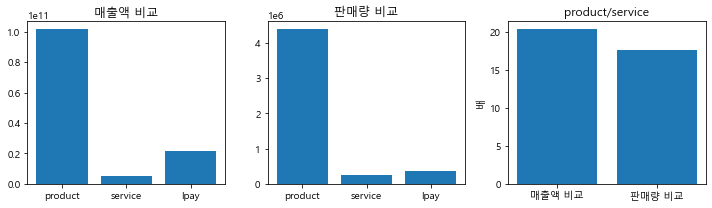

In [260]:
fig, axes = plt.subplots(1,3, figsize=(10,3))
axes[0].bar(['product', 'service', 'lpay'], [trans_lst.buy_am.sum(), service_use.buy_am.sum(), lpay.buy_am.sum()])
axes[0].set_title('매출액 비교')
axes[1].bar(['product', 'service', 'lpay'], [trans_lst.shape[0], service_use.shape[0], lpay.shape[0]])
axes[1].set_title('판매량 비교')
axes[2].bar(['매출액 비교', '판매량 비교'], [trans_lst.buy_am.sum()/service_use.buy_am.sum(), trans_lst.shape[0]/service_use.shape[0]])
axes[2].set_title('product/service')
axes[2].set_ylabel('배')
plt.tight_layout()
plt.show()

In [16]:
lpay['cop_c'] = lpay['cop_c'].astype('category')
lpay['cop_c'] = lpay['cop_c'].cat.reorder_categories(sorted(lpay['cop_c'].unique()))

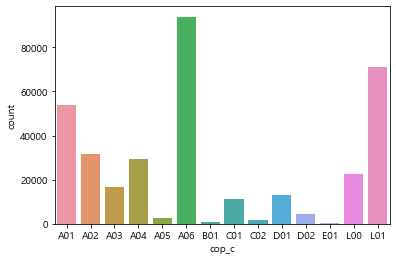

In [17]:
sns.countplot(data=lpay, x='cop_c')
plt.show()

- lpoint 공모전이기 때문에 lpay의 부흥을 일으키는 방향으로 하면 좋아할 것 같음
  - lpay를 사용하지 않고 구매한 고객을 lpay를 사용하도록 하는 방법?
    - 두 고객 집단의 차이점은?